# 3.5.1 Плазма
----

In [923]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [924]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

In [925]:
U_R = [25.7, 22.1, 19.8, 17.0, 16.0, 15.0, 15.5, 16.5, 18.0, 18.5, 21.0]
I_R = [1.93, 2.28, 2.67, 3.27, 3.74, 4.75, 4.33, 3.42, 3.05, 2.92, 2.45]
# U_R = [25.7, 22.1, 19.8, 17.0, 16.0, 15.0]
# I_R = [1.93, 2.28, 2.67, 3.27, 3.74, 4.75]


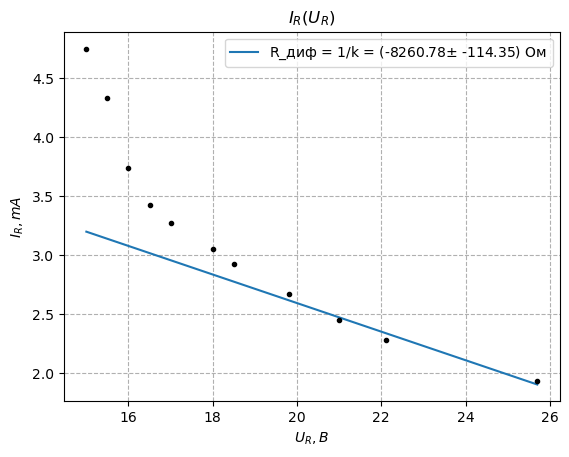

In [926]:
plt.figure()
plt.title("$I_R(U_R)$")
plt.xlabel("$U_R, B$")
plt.ylabel("$I_R, mA$")

plt.grid(True, linestyle="--")
plt.errorbar([i for i in U_R], [i for i in I_R], fmt=".k")
x = np.array([min(U_R), max(U_R)])
k, b, kerr, berr = LeastSquares([25.7, 22.1, 21.0, 19.8], [1.93, 2.28, 2.45, 2.67])
plt.plot(x, k*x + b, label=f'R_диф = 1/k = ({round(1/k*1000, 2)}$\\pm$ {round(kerr / k * 1000, 2)}) Ом')

plt.legend()
plt.show()

In [927]:
kb = 1.38 * 10**-23
mi = 22 * 1.66 * 10**-27
e = 1.67 * 10**-19

S = 3.27 * 10**-6

## Зондовые харки


## 5 mA

In [928]:
U_Z = [-25.1, -22.0, -19.1, -16.1, -13.0, -10.0, -8.1, -6.1, -4.1, -2.1, -0.6, 0.0,
       0.4, 1.0, 1.6, 2, 4, 6, 8, 10, 13, 16, 19, 22, 25.1]
I_Z = [-104.6, -103.8, -102.6, -99.1, -92.3, -80.8, -70.7, -57.6, -42, -24.3, -13.9, -9.4,
       -7.3, -3.5, -0.1, 4.5, 19.6, 35.8, 49.5, 61, 73.4, 80, 83, 83.8, 84.6]

I_0 = sum(I_Z) / len(I_Z)
print(I_0)
I_Z = [i - I_0 for i in I_Z]

U_Z_5 = U_Z
I_Z_5 = I_Z

-9.472


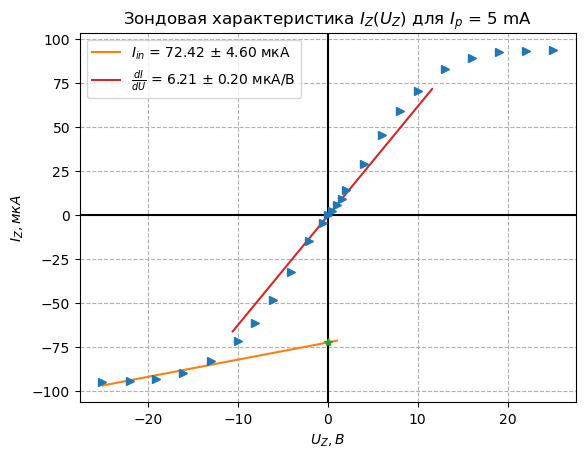

In [929]:
plt.figure()
plt.title("Зондовая характеристика $I_Z(U_Z)$ для $I_p$ = 5 mA")
plt.xlabel("$U_Z, B$")
plt.ylabel("$I_Z, мкA$")

plt.grid(True, linestyle="--")
plt.errorbar([i for i in U_Z], [i for i in I_Z], fmt=">")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

x = np.array([U_Z[0], 1])
k, b, kerr, berr = LeastSquares(U_Z[0:5], I_Z[0:5])
plt.plot(x, k*x + b, label='$I_{in}$' + f' = {round(abs(b), 2)} $\\pm$ {round(berr, 2)}0 мкА')

plt.errorbar([0], [b], fmt="*")
I_in = abs(b)

din = len(U_Z) // 2 - 2
dax = len(U_Z) // 2 + 2
x = np.array([U_Z[din] - 10, U_Z[dax] + 10])
k, b, kerr, berr = LeastSquares(U_Z[din:dax + 1], I_Z[din:dax + 1])
plt.plot(x, k*x + b, label='$\\frac{dI}{dU}$' + f' = {round(abs(k), 2)} $\\pm$ {round(kerr, 2)}0 мкА/В')
dd = k

plt.legend()
plt.show()

In [930]:
T_e = 1/2 * (1.6 * 10**-19 * I_in) / (dd * 1.38 * 10**-23)
T_e, T_e * 0.12
kb * T_e / (1.67 * 10**-19), kb * T_e * 0.12 / (1.67 * 10**-19)


(np.float64(5.588332083336212), np.float64(0.6705998500003455))

In [931]:
n_e = I_in / 0.4 / e / np.sqrt(2 * kb * T_e / mi) / S
w_p = 5.6 * 10**4 * np.sqrt(n_e)
print(n_e, w_p)

4.637274075525611e+22 1.2059225307144864e+16


## 3 mA

In [932]:
U_Z = [-25.1, -22.1, -19, -16, -13.1, -10.1, -8, -6, -4.1, -2, -1, 0,
       0.7, 2.1, 4, 6.1, 8, 10.1, 13, 15.9, 19.1, 22.1, 25.1]
I_Z = [-67.9, -66, -63.9, -61.7, -58.7, -53.5, -47.9, -40.1, -31.1, -20.1, -13.7, -7.8,
       -6.5, 2.1, 13.3, 23.2, 31.2, 37.8, 43.6, 46.8, 48.9, 50.4, 52.4]

I_0 = sum(I_Z) / len(I_Z)

I_Z = [i - I_0 for i in I_Z]
U_Z_3 = U_Z
I_Z_3 = I_Z

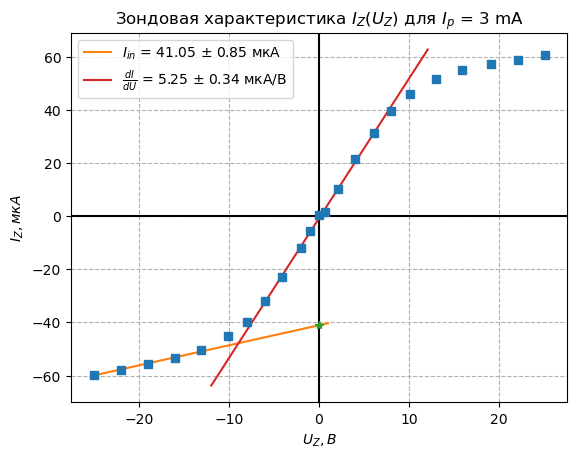

In [933]:
plt.figure()
plt.title("Зондовая характеристика $I_Z(U_Z)$ для $I_p$ = 3 mA")
plt.xlabel("$U_Z, B$")
plt.ylabel("$I_Z, мкA$")

plt.grid(True, linestyle="--")
plt.errorbar([i for i in U_Z], [i for i in I_Z], fmt="s")
x = np.array([min(U_Z), max(U_Z)])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

x = np.array([U_Z[0], 1])
k, b, kerr, berr = LeastSquares(U_Z[0:5], I_Z[0:5])
plt.plot(x, k*x + b, label='$I_{in}$' + f' = {round(abs(b), 2)} $\\pm$ {round(berr, 2)} мкА')

plt.errorbar([0], [b], fmt="*")
I_in = abs(b)

din = len(U_Z) // 2 - 2
dax = len(U_Z) // 2 + 2
x = np.array([U_Z[din] - 10, U_Z[dax] + 10])
k, b, kerr, berr = LeastSquares(U_Z[din:dax + 1], I_Z[din:dax + 1])
plt.plot(x, k*x + b, label='$\\frac{dI}{dU}$' + f' = {round(abs(k), 2)} $\\pm$ {round(kerr, 2)} мкА/В')
dd = k

plt.legend()
plt.show()

In [934]:
T_e = 1/2 * (1.6 * 10**-19 * I_in) / (dd * 1.38 * 10**-23)
T_e, T_e * 0.12
kb * T_e / (1.67 * 10**-19), kb * T_e * 0.12 / (1.67 * 10**-19)

(np.float64(3.74694679079364), np.float64(0.4496336148952368))

In [935]:
n_e = I_in / 0.4 / e / np.sqrt(2 * kb * T_e / mi) / S
w_p = 5.6 * 10**4 * np.sqrt(n_e)
print(n_e, w_p)

3.210581945055595e+22 1.0034134232555566e+16


## 1.5 mA

In [936]:
U_Z = [-25.1, -22.1, -19.1, -16.1, -13, -10, -8, -6.1, -4, -1.9, -0.8, 0,
       0.67, 2.1, 4.1, 6.1, 8.1, 10, 13.1, 16, 19.1, 22, 25.1]
I_Z = [-35.7, -34.4, -33.2, -31.9, -30.4, -28.3, -26, -22.7, -18.2, -12, -8.3, -5.4,
       -3.7, 1, 7.2, 12.2, 16.1, 18.5, 21, 22, 23, 23.7, 24.6]

I_0 = sum(I_Z) / len(I_Z)

I_Z = [i - I_0 for i in I_Z]
U_Z_1 = U_Z
I_Z_1 = I_Z

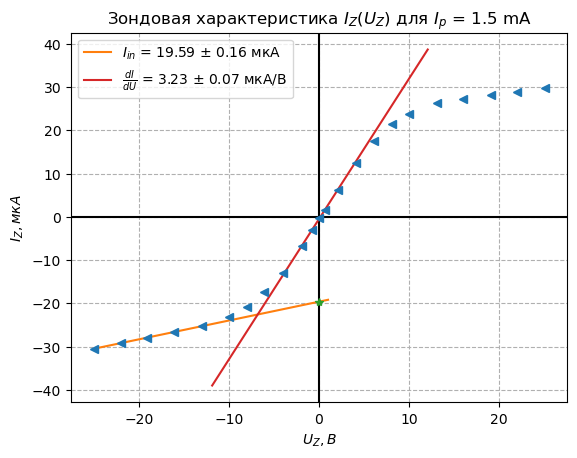

In [937]:
plt.figure()
plt.title("Зондовая характеристика $I_Z(U_Z)$ для $I_p$ = 1.5 mA")
plt.xlabel("$U_Z, B$")
plt.ylabel("$I_Z, мкA$")

plt.grid(True, linestyle="--")
plt.errorbar([i for i in U_Z], [i for i in I_Z], fmt="<")
x = np.array([min(U_Z), max(U_Z)])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

x = np.array([U_Z[0], 1])
k, b, kerr, berr = LeastSquares(U_Z[0:5], I_Z[0:5])
plt.plot(x, k*x + b, label='$I_{in}$' + f' = {round(abs(b), 2)} $\\pm$ {round(berr, 2)} мкА')

plt.errorbar([0], [b], fmt="*")

I_in = abs(b)

din = len(U_Z) // 2 - 2
dax = len(U_Z) // 2 + 2
x = np.array([U_Z[din] - 10, U_Z[dax] + 10])
k, b, kerr, berr = LeastSquares(U_Z[din:dax + 1], I_Z[din:dax + 1])
plt.plot(x, k*x + b, label='$\\frac{dI}{dU}$' + f' = {round(abs(k), 2)} $\\pm$ {round(kerr, 2)} мкА/В')

dd = k

plt.legend()
plt.show()

In [938]:
T_e = 1/2 * (1.6 * 10**-19 * I_in) / (dd * 1.38 * 10**-23)
T_e, T_e * 0.12
kb * T_e / (1.67 * 10**-19), kb * T_e * 0.12 / (1.67 * 10**-19)

(np.float64(2.9007574259757156), np.float64(0.34809089111708585))

In [939]:
n_e = I_in / 0.4 / e / np.sqrt(2 * kb * T_e / mi) / S
w_p = 5.6 * 10**4 * np.sqrt(n_e)
print(n_e, w_p)

1.7407765294236857e+22 7388555471993615.0


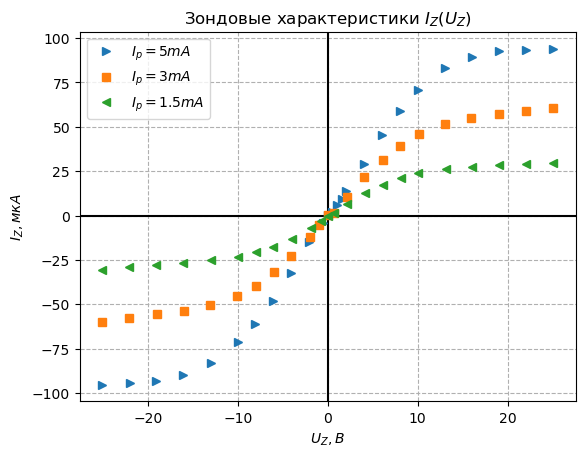

In [940]:
plt.figure()
plt.title("Зондовые характеристики $I_Z(U_Z)$")
plt.xlabel("$U_Z, B$")
plt.ylabel("$I_Z, мкA$")

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.grid(True, linestyle="--")

plt.errorbar([i for i in U_Z_5], [i for i in I_Z_5], fmt=">", label = '$I_p = 5 mA$')
plt.errorbar([i for i in U_Z_3], [i for i in I_Z_3], fmt="s", label = '$I_p = 3 mA$')
plt.errorbar([i for i in U_Z_1], [i for i in I_Z_1], fmt="<", label = '$I_p = 1.5 mA$')


plt.legend()
plt.show()

In [941]:
T = [67.6, 45.3, 35.1]
Terr = [8.1, 5.4, 4.2]

I_p = [5, 3, 2]
I_perr = [0.1, 0.1, 0.1]

n_e = [4.63, 3.21, 1.74]
nerr = [0.4, 0.21, 0.09]

/tmp/ipykernel_8240/1314777091.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


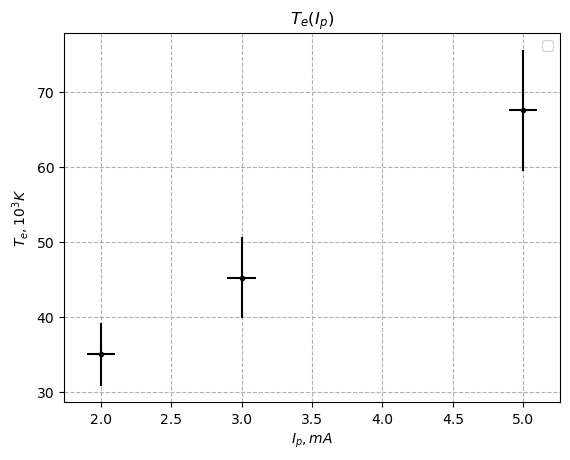

In [942]:
plt.figure()
plt.title("$T_e(I_p)$")
plt.xlabel("$I_p, mA$")
plt.ylabel("$T_e, 10^3 K$")

plt.grid(True, linestyle="--")
plt.errorbar(I_p, T, xerr=I_perr, yerr=Terr, fmt=".k")
x = np.array([min(I_p), max(I_p)])

plt.legend()
plt.show()

/tmp/ipykernel_8240/3800458983.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


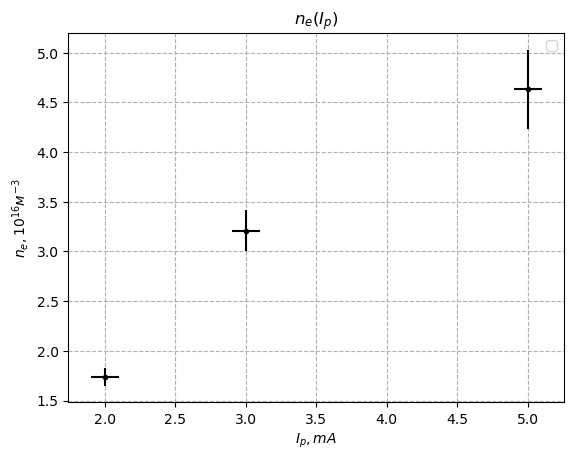

In [943]:
plt.figure()
plt.title("$n_e(I_p)$")
plt.xlabel("$I_p, mA$")
plt.ylabel("$n_e, 10^{16} м^{-3}$")

plt.grid(True, linestyle="--")
plt.errorbar(I_p, n_e, xerr=I_perr, yerr=nerr, fmt=".k")
x = np.array([min(I_p), max(I_p)])

plt.legend()
plt.show()